In [1]:
import pandas as pd

In [9]:
df = pd.read_csv(r'DigiDB_digimonlist.csv')

In [10]:
df.head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86


In [13]:
import seaborn as sns

In [11]:
df.drop(columns='Number')

,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86
5,Koromon,In-Training,Free,Fire,3,0,940,52,109,93,52,76
6,Tanemon,In-Training,Free,Plant,3,0,1030,64,85,82,73,69
7,Tsunomon,In-Training,Free,Earth,3,0,930,54,107,92,54,76
8,Tsumemon,In-Training,Free,Dark,3,0,930,64,108,64,54,93
9,Tokomon,In-Training,Free,Neutral,3,0,640,86,76,74,74,103


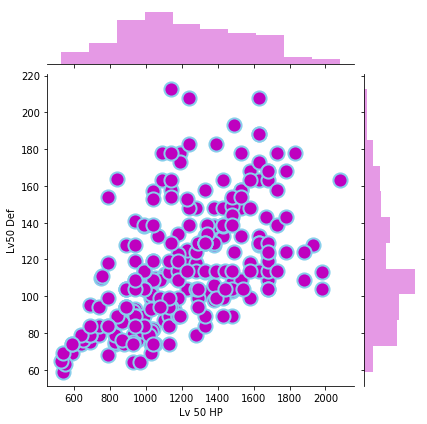

In [15]:
#Do pokemon that have more health have a higher defense 
sns.jointplot(x=df["Lv 50 HP"], y=df["Lv50 Def"], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)

#Since you see a roughly linear correlation, the answer is yes.

In [16]:
from scipy import stats
import matplotlib.pyplot as plt

In [17]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

In [20]:
x=df["Lv 50 HP"]
y=df["Lv50 Def"]
stats.pearsonr(x, y)#

(0.5613761242981814, 4.454120392297386e-22)

In [ ]:
#Low p value bolsters this argument

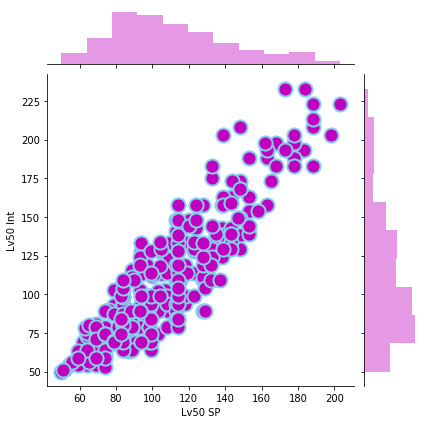

In [22]:
# Are spirit and health correlated? 
sns.jointplot(x=df["Lv50 SP"], y=df["Lv50 Int"], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)
#not surprisingly, magic users have higher spirit

In [23]:
x=df["Lv50 Int"]
y=df["Lv50 SP"]
stats.pearsonr(x, y)

(0.8956523296996886, 6.89290257837542e-89)

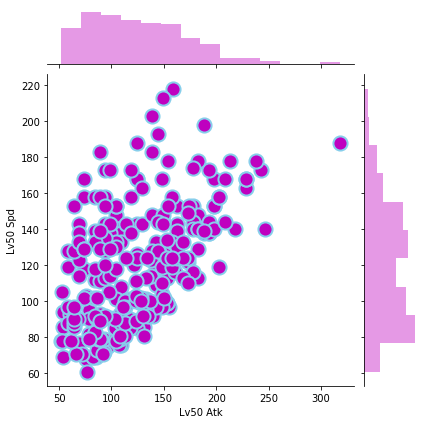

In [24]:
# Are spirit and health correlated? 
sns.jointplot(x=df["Lv50 Atk"], y=df["Lv50 Spd"], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)
#not surprisingly, magic users have higher spirit

In [ ]:
# correlation isn't as strong. 

In [5]:
cleanup_nums = {"Stage":     {"Ultimate" : 6, "Champion" : 5, "Mega": 4, "Ultra": 5, "Armor" : 3, "Rookie": 2, "In-Training" : 1 , "Baby" : 0},
               "Type" : {"Data" : 0, "Vaccine" : 1, "Virus" : 2, "Free" : 3},
               "Attribute" : { "Plant" : 0, "Wind" : 1, "Light" : 2, "Fire" : 3, "Neutral" : 4, "Dark" : 5, "Earth" : 6, "Plant" : 7, "Electric" : 8, "Water" : 9}}

In [6]:
df.replace(cleanup_nums, inplace=True)

In [7]:
df.head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,0,3,4,2,0,590,77,79,69,68,95
1,2,Pabumon,0,3,4,2,0,950,62,76,76,69,68
2,3,Punimon,0,3,4,2,0,870,50,97,87,50,75
3,4,Botamon,0,3,4,2,0,690,68,77,95,76,61
4,5,Poyomon,0,3,4,2,0,540,98,54,59,95,86


In [8]:
df = df.drop(columns='Digimon')

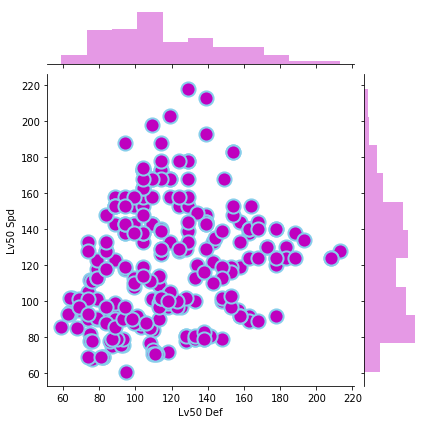

In [82]:
#Do pokemon that have more health have a higher defense 
sns.jointplot(x=df["Lv50 Def"], y=df["Lv50 Spd"], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)

#Since you see a roughly linear correlation, the answer is yes.

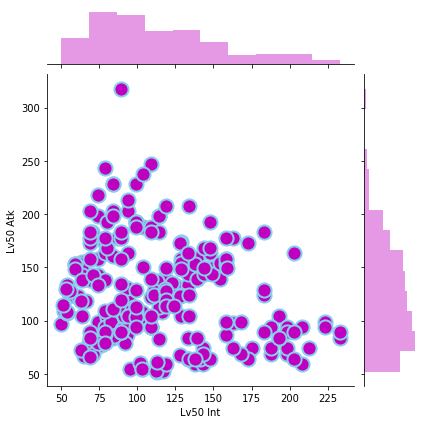

In [81]:
#Do pokemon that have more health have a higher defense 
sns.jointplot(x=df["Lv50 Int"], y=df["Lv50 Atk"], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)

#Since you see a roughly linear correlation, the answer is yes.

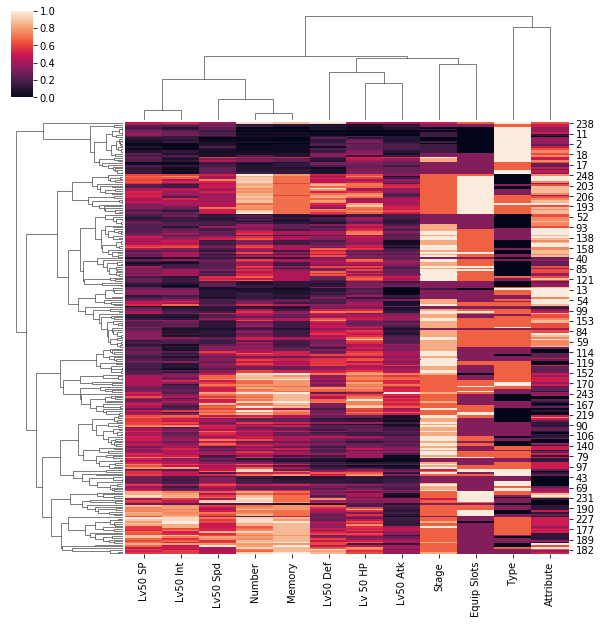

In [74]:
g = sns.clustermap(df, metric="correlation", standard_scale=1)